<a href="https://colab.research.google.com/github/R-Owino/KNN-Naive-Bayes/blob/main/Moringa_Data_Science_Core_W9_Independent_Project_2022_05_Rehema_Owino_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbour

## 1. Defining the Question


### a) Specifying the question
Using the Titanic dataset, build a model to predict whether a passenger survived or not.

### b) Defining the Metric for Success
The success will be determined if we can satisfactorily challenge the solution by optimizing the KNN model.

### c) Understanding the context 
- The Titanic sank in the early morning hours of 15 April 1912 in the North Atlantic Ocean, four days into her maiden voyage from Southampton to New York City. The largest ocean liner in service at the time, Titanic had an estimated 2,224 people on board when she struck an iceberg at around 23:40 (ship's time) on Sunday, 14 April 1912. Her sinking two hours and forty minutes later at 02:20 (ship's time; 05:18 GMT) on Monday, 15 April, resulted in the deaths of more than 1,500 people, making it one of the deadliest peacetime maritime disasters in history.[source](https://)
- In this project, I will be classifying the passengers as either survived(1) or did not survive(0) using the KNN algorithm.

### d) Recording the Experimental Design
1. Load and read the data.
2. Clean the data.
3. Perform exploratory analysis.
4. Build a model using KNN.
5. Challenge the solution by optimizing the KNN model.

## 2. Reading the Data

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the Data 
def read_data(url):
  file_id = url.split('/')[-2]
  dwn_url = 'https://drive.google.com/uc?id='+ file_id
  df = pd.read_csv(dwn_url)
  return df

train = read_data('https://drive.google.com/file/d/1k3CggM_h39ySebjqFcfH3rNximaPdjXS/view?usp=sharing')
test = read_data('https://drive.google.com/file/d/1rKE7MTfxp1QRta1iOc7MDreQFHwcThPR/view?usp=sharing')



## 3. Checking the Data

In [4]:
# Determining the no. of records in our dataset

print('There are ' +str(train.shape[0])+ ' rows and ' +str(train.shape[1])+ ' columns in the train table')
print('There are ' +str(test.shape[0])+ ' rows and ' +str(test.shape[1])+ ' columns in the test table')

There are 891 rows and 12 columns in the train table
There are 418 rows and 11 columns in the test table


In [5]:
# Previewing the top of our dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
# Previewing the bottom of our dataset
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [9]:
# Checking whether each column has an appropriate datatype
print(train.dtypes)
print('#'*60)
print(test.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
############################################################
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


- From previewing the data, we can clearly see that the test data does not have the survived column that the train data has. The datasets, therefore, cannot be merged. 

Column description:
- Survived - Survival (0 = No; 1 = Yes)
- Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- Name - Name
- Sex - Sex
- Age - Age
- SibSp - Number of Siblings/Spouses Aboard
- Parch - Number of Parents/Children Aboard
- Ticket - Ticket Number
- Fare - Passenger Fare (British pound)
- Cabin - Cabin
- Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

## 4. Tidying the Dataset

- Using the train dataset only:

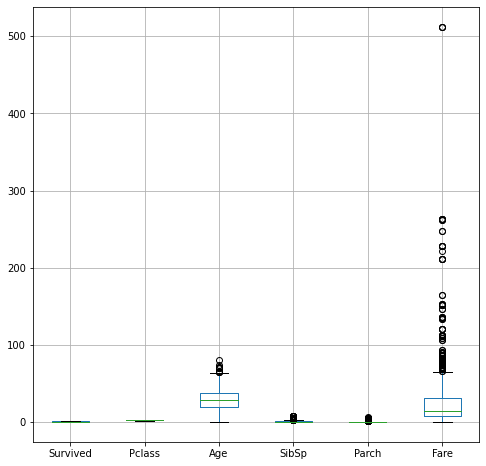

In [21]:
# Checking for Outliers using a boxplot
cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
plt.subplots(figsize=(8,8))
train.boxplot(cols)

plt.title=('Checking for Outliers')
plt.show()

- There are outliers in the age, number of siblings/spouses aboard, number of parents/children aboard and fare columns, which I'm not going to remove because it will greatly reduce the size of the dataset causing incorrect analysis and prediction.

In [22]:
# Checking for Anomalies - duplicates
train.duplicated().any()

False

- There are no duplicates in the dataset

In [23]:
# Identifying the Missing Data
print('There are ' + str(train.isnull().sum().sum()) + ' missing values in the dataset')

There are 866 missing values in the dataset


In [24]:
# Dealing with the Missing Data

# Check the number of missing values in each column
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 - Out of 891 rows, cabin has 687 missing values. The column will be dropped. 
 - The age column cannot be dropped as it is crucial to the prediction. The null values will be filled.
 - The embarked column has only 2 missing values. These can also be filled.

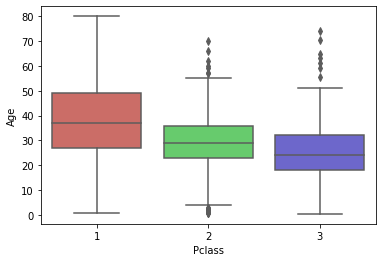

In [25]:
# Filling the missing values in the age column

# First, let's check how the age af a passenger relates to their class on the boat 
sns.boxplot(x='Pclass', y='Age', data=train, palette='hls')

- From the boxplot, we could say that more younger passengers are in the third class than in the first, where older passengers mostly dominate. 
- In this light, I will use the Pclass to guestimate the age of a passenger. 
- The average ages of passengers in the 1st class is around 37, 2nd class is 28 and 3rd class is 24,

In [26]:
# A function that checks null values in the Age column, and for each null, it checks the value of the Pclass
# and assigns an age value according to the average age of passengers in that class. 

def approximate_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 28
        else:
            return 24
    else:
        return Age

# applying the function 
train['Age'] = train[['Age', 'Pclass']].apply(approximate_age, axis=1)

In [27]:
# Filling the missing values in embarked column
train["Embarked"].fillna( method ='ffill', inplace = True)

In [28]:
# Dropping the cabin column
train = train.drop('Cabin', axis = 1)

# Checking if the null values have been properly fixed
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

- There are no more null values in the dataset.

In [30]:
# More data cleaning procedures

# Since we're determining the probability of survival of a passenger, I will drop the columns 
# that do not contribute to prediction

train = train.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)
train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


## 5. Exploratory Analysis

### Univariate Analysis

In [34]:
# Bar chart function for displaying values associated with categorical data
def bar(column, figsize):
  plt.figure(figsize = figsize)
  train[column].value_counts().plot.bar()
  # plt.title('Bar chart representation for {}'.format(column))
  plt.xlabel(column)
  plt.ylabel('Count')
  return plt.show()

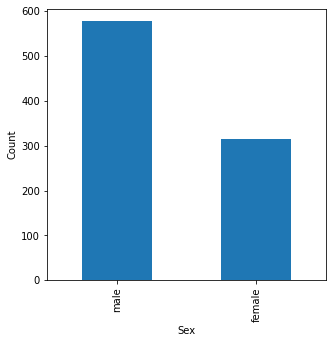

In [36]:
# Bar chart representation for sex
bar('Sex', (5,5))


- There were more males than females on the boat.

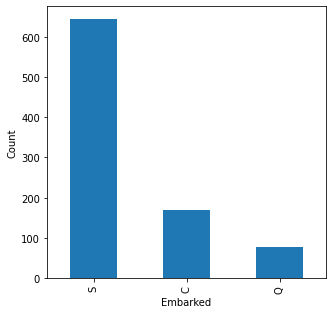

In [35]:
# Bar chart representation for embarked
bar('Embarked', (5,5))

- Most people boarded the boat at Southampton

### Bivariate Analysis

Numerical - Numerical

In [39]:
# scatter plot function
def plotscatter(column1, column2):
  plt.scatter(train[column1], train[column2])
  plt.xlabel(column1)
  plt.ylabel(column2)
  # plt.title('Scatter plot for {} and {}'.format(column1, column2))
  return plt.show()

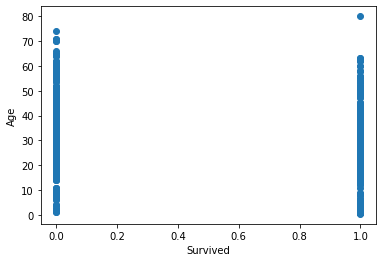

In [41]:
plotscatter('Survived', 'Age')

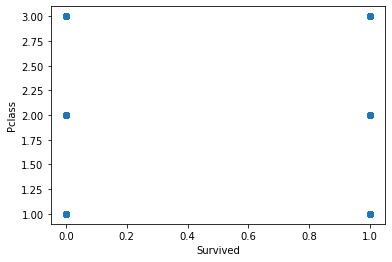

In [42]:
plotscatter('Survived', 'Pclass')

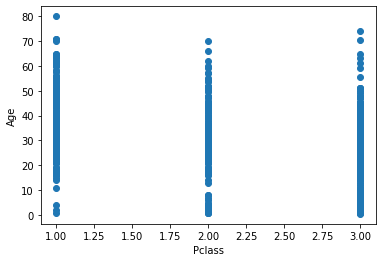

In [43]:
plotscatter('Pclass', 'Age')

In [44]:
# correlation between the variables
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.047214,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.408126,0.083081,0.018443,-0.549500
Age,-0.047214,-0.408126,1.000000,-0.243074,-0.170646,0.124235
SibSp,-0.035322,0.083081,-0.243074,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.170646,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.124235,0.159651,0.216225,1.000000


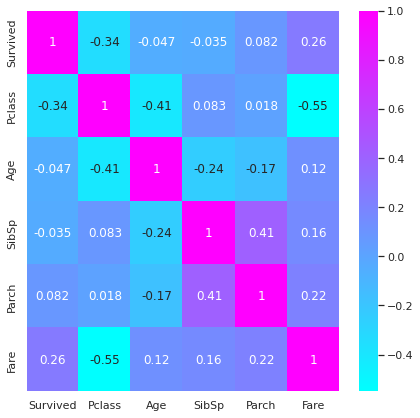

In [45]:
# correlation heatmap
sns.set(rc={'figure.figsize':(7, 7)})
df_plot = sns.heatmap(train.corr(), cmap="cool", annot=True)
plt.show()

In [46]:
# sum of the correlations for each element as absolute values
corr_df = train.corr(method='pearson')
corr_abs_sum = corr_df.abs().sum()

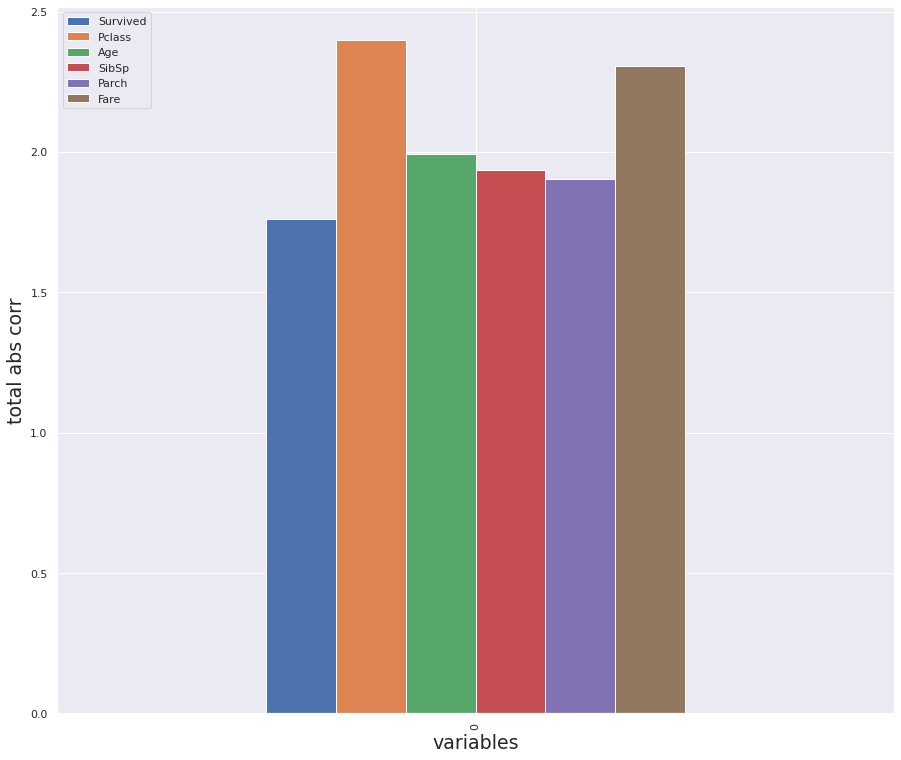

In [48]:
total_abs_corr = pd.DataFrame(corr_abs_sum).T

total_abs_corr.plot.bar(figsize=(15,13)) #(kind='bar', width=0.65, rot=0)
# plt.title("TOTAL ABSOLUTE CORRELATION FOR EACH VARIABLE", fontsize=20)
plt.xlabel('variables', fontsize = 19)
plt.ylabel('total abs corr', fontsize = 19)
plt.legend(loc="upper left")

- From the correlation heatmap, we can observe that the variables range from weak to moderately correlated.
- From the absolute correlation graph, the survived variable has the least, but it cannot be dropped because it is the target variable.

In [49]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.054063,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.245055,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Multivariate Analysis

In [53]:
# Encoding the categorical columns 
cat_cols = ['Sex', 'Embarked']
train = pd.get_dummies(train, columns = cat_cols)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [54]:
# Data Reduction using LDA

# splitting into feature and target 
X = train.drop(['Survived'], axis = 1).values
y = train['Survived'].values

# applying LDA with all the components
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
clf = lda.fit_transform(X, y)



## 6. Implementing the Solution

### Perfoming predictive analysis using various test sizes

In [57]:
# 80-20 split

# splitting into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# standarizing
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# fitting the model
classifier = KNeighborsClassifier(n_neighbors = 9)
classifier.fit(X_train, y_train)

# making prediction
y_pred = classifier.predict(X_test)

# Evaluating the algorithm 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[100  10]
 [ 22  47]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       110
           1       0.82      0.68      0.75        69

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



In [58]:
# 70-30 split

# splitting into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# standarizing
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# fitting the model
classifier = KNeighborsClassifier(n_neighbors = 9)
classifier.fit(X_train, y_train)

# making prediction
y_pred = classifier.predict(X_test)

# Evaluating the algorithm 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[149  19]
 [ 34  66]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       168
           1       0.78      0.66      0.71       100

    accuracy                           0.80       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.80      0.80      0.80       268



In [59]:
# 60-40 split

# splitting into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# standarizing
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# fitting the model
classifier = KNeighborsClassifier(n_neighbors = 9)
classifier.fit(X_train, y_train)

# making prediction
y_pred = classifier.predict(X_test)

# Evaluating the algorithm 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[198  23]
 [ 45  91]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       221
           1       0.80      0.67      0.73       136

    accuracy                           0.81       357
   macro avg       0.81      0.78      0.79       357
weighted avg       0.81      0.81      0.81       357



While using the number of k(nearest_neighbour) as 9:
- 80-20 split gives the highest accuracy of 82%, with 100 and 47 correctly predicted records. 
- 70-30 split gives an accuracy of 80%, with 149 and 66 correctly predicted records.
- 60-40 split gives an accuracy of 81%, with 198 and 91 correctly predicted records.

## 7. Challenging the solution

In [60]:
# Since the 80-20 split gave the highest accuracy, I will perform optimization on it
# finding the optimal value of k 
# splitting into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# standarizing
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

error_rate = [] # list to hold various error rates at various k values
for i in range(1,20):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

print("Minimum error: ",min(error_rate),"at K = ",error_rate.index(min(error_rate)))

Minimum error:  0.1564245810055866 at K =  6


In [61]:
# training the model at k = 6 
# fitting the model
classifier = KNeighborsClassifier(n_neighbors = 6)
classifier.fit(X_train, y_train)

# making prediction
y_pred = classifier.predict(X_test)

# Evaluating the algorithm 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[102   8]
 [ 24  45]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.86       110
           1       0.85      0.65      0.74        69

    accuracy                           0.82       179
   macro avg       0.83      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179



- With an optimal value of k = 6, there is an accuracy of 82% and 102 and 45 correctly predicted records.

## 8. Follow up questions

### a). Did we have the right data?
Yes

### b). Do we need other data to answer our question?
No

### c). Did we have the right question?
Yes

## 9. Conclusion
Before optimizing the model, we got the highest accuracy score of 82% from the 80-20 split. This was got using the number of k as 9. After optimization using an optimal value of k as 6 and using the same split criterion, we got a similar accuracy score.